In [1]:
import pandas as pd

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data -O data_4.csv

--2023-10-10 20:34:07--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data_4.csv’

data_4.csv          100%[===================>]   1,41M   531KB/s    in 2,7s    

2023-10-10 20:34:10 (531 KB/s) - ‘data_4.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data_4.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
data = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

In [6]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [7]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [8]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
data = data.fillna(0)

In [10]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
mean_price = data.msrp.mean()

In [12]:
mean_price

40594.737032063116

In [13]:
above_average = data.msrp.values > mean_price

In [14]:
above_average

array([ True,  True, False, ...,  True,  True, False])

In [15]:
above_average = above_average.astype(int)
above_average

array([1, 1, 0, ..., 1, 1, 0])

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
data['above_average'] = above_average
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [24]:
df_fulltrain, df_test = train_test_split(data, test_size=0.2, random_state=1)

In [25]:
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0
...,...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,20995,0
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,35850,0
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,20265,0
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,2000,0


In [29]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [30]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [31]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595
...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,20995
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,35850
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,20265
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,2000


In [32]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int64
dtype: object

In [33]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [34]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [35]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16


In [36]:
from sklearn.metrics import roc_auc_score

In [38]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%s %.3f' % (c, auc))

year 0.688
engine_hp 0.917
engine_cylinders 0.766
highway_mpg 0.633
city_mpg 0.673


In [39]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [41]:
dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(dicts)
model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter = 1000)
model.fit(X_train, y_train)

dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)

y_pred = model.predict_proba(X_val)[:,1]



In [42]:
y_pred

array([0.64240495, 0.01506024, 0.48519413, ..., 0.00528823, 0.99998724,
       0.09593936])

In [43]:
from sklearn.metrics import auc

In [44]:
auc_2 = roc_auc_score(y_val, y_pred)

In [45]:
auc_2

0.9765725180983509

In [46]:
round(auc_2, 3)

0.977

In [47]:
import numpy as np

In [48]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive_ = (y_val == 1)
    actual_negative_ = (y_val == 0)
    
    predict_positive_ = (y_pred >= t)
    predict_negative_ = (y_pred < t)
    
    tp_ = (predict_positive_ & actual_positive_).sum()
    tn_ = (predict_negative_ & actual_negative_).sum()    
    
    fp_ = (predict_positive_ & actual_negative_).sum()
    fn_ = (predict_negative_ & actual_positive_).sum()
    
    scores.append((t, tp_, fp_, fn_, tn_))

In [49]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,839,2,890
2,0.02,651,680,3,1049
3,0.03,651,592,3,1137
4,0.04,650,543,4,1186
...,...,...,...,...,...
96,0.96,255,1,399,1728
97,0.97,237,1,417,1728
98,0.98,211,0,443,1729
99,0.99,181,0,473,1729


In [50]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [51]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,654,1729,0,0,1.000000,1.000000
1,0.01,652,839,2,890,0.996942,0.485252
2,0.02,651,680,3,1049,0.995413,0.393291
3,0.03,651,592,3,1137,0.995413,0.342394
4,0.04,650,543,4,1186,0.993884,0.314054
...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.389908,0.000578
97,0.97,237,1,417,1728,0.362385,0.000578
98,0.98,211,0,443,1729,0.322630,0.000000
99,0.99,181,0,473,1729,0.276758,0.000000


In [52]:
import matplotlib.pyplot as plt

In [53]:
del df_scores['tpr']
del df_scores['fpr']


In [54]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,839,2,890
2,0.02,651,680,3,1049
3,0.03,651,592,3,1137
4,0.04,650,543,4,1186
...,...,...,...,...,...
96,0.96,255,1,399,1728
97,0.97,237,1,417,1728
98,0.98,211,0,443,1729
99,0.99,181,0,473,1729


In [55]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['fpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [56]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,839,2,890,0.437290,0.996942
2,0.02,651,680,3,1049,0.489106,0.995413
3,0.03,651,592,3,1137,0.523733,0.995413
4,0.04,650,543,4,1186,0.544845,0.993884
...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.996094,0.389908
97,0.97,237,1,417,1728,0.995798,0.362385
98,0.98,211,0,443,1729,1.000000,0.322630
99,0.99,181,0,473,1729,1.000000,0.276758


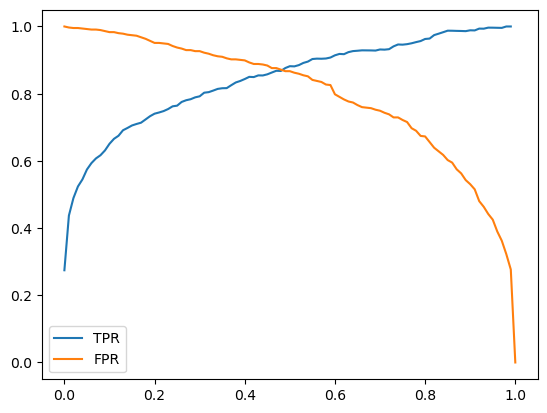

In [57]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

In [58]:
df_scores[28::20]

,threshold,tp,fp,fn,tn,tpr,fpr
28,0.28,608,168,46,1561,0.783505,0.929664
48,0.48,570,87,84,1642,0.867580,0.871560
68,0.68,495,38,159,1691,0.928705,0.756881
88,0.88,368,5,286,1724,0.986595,0.562691


In [59]:
df_scores['f1'] = 2 * (df_scores.tpr * df_scores.fpr / (df_scores.tpr + df_scores.fpr))

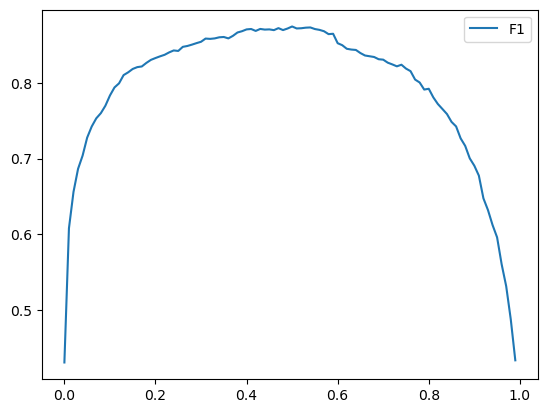

In [60]:
plt.plot(df_scores.threshold, df_scores.f1, label='F1')
plt.legend()

In [61]:
df_scores[12::20]

,threshold,tp,fp,fn,tn,tpr,fpr,f1
12,0.12,641,309,13,1420,0.674737,0.980122,0.799252
32,0.32,601,146,53,1583,0.804552,0.918960,0.857959
52,0.52,562,73,92,1656,0.885039,0.859327,0.871994
72,0.72,483,35,171,1694,0.932432,0.738532,0.824232
92,0.92,314,2,340,1727,0.993671,0.480122,0.647423


In [62]:
from sklearn.model_selection import KFold

In [63]:
from tqdm.auto import tqdm

In [65]:
df_fulltrain
    

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
2711,Mercedes-Benz,CLK-Class,2007,382.0,8.0,AUTOMATIC,Coupe,22,15,54900,1
333,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,29990,0
9377,GMC,Sierra 1500,2017,285.0,6.0,AUTOMATIC,Extended Cab Pickup,24,18,32230,0
939,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,102930,1
5675,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,28795,0
...,...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,6.0,AUTOMATIC,4dr SUV,26,18,53500,1
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,47975,1
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,2000,0
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,22220,0


In [66]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_fulltrain)):
    df_train = df_fulltrain.iloc[train_idx]
    df_val = df_fulltrain.iloc[val_idx]
    
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    dicts_val = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(dicts_val)

    y_pred = model.predict_proba(X_val)[:,1]

    auc = roc_auc_score(y_val, y_pred)
    
    scores.append(auc)

0it [00:00, ?it/s]

In [67]:
scores

[0.9784891235596622,
 0.9802015987157496,
 0.977745245663934,
 0.9772628408900788,
 0.9776806526806527]

In [68]:
np.std(scores)

0.0010407672156355376

In [71]:
for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_fulltrain)):
        df_train = df_fulltrain.iloc[train_idx]
        df_val = df_fulltrain.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dicts = df_train[categorical + numerical].to_dict(orient='records')
        dv = DictVectorizer()
        X_train = dv.fit_transform(dicts)
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        dicts_val = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(dicts_val)

        y_pred = model.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)

        scores.append(auc)
    
    print('c=%s mean=%.3f std=%.3f' % (C, round(np.mean(scores), 3), round(np.std(scores), 3)))
    

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

c=0.01 mean=0.952 std=0.003


0it [00:00, ?it/s]

c=0.1 mean=0.972 std=0.002


0it [00:00, ?it/s]

c=0.5 mean=0.977 std=0.001


0it [00:00, ?it/s]

c=10 mean=0.980 std=0.003
